                                             MVA - MCMC
                                             TP3 - Hasting-Metropolis and Gibbs samplers
                                        Achari Berrada Youssef 

# Exercice 2: Multiplicative Hasting-Metropolis

In [76]:
# Import the libraries: 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from scipy.stats import bernoulli
from scipy.stats import norm as nm
from scipy.stats import expon as exp 

We consider the density f as uniform density function in [-1,1], from which we sample $\epsilon$

In [43]:
def f(): 
     np.random.uniform(-1,1)

We consider the Bernoulli distribution with parameter 0.5 

In [44]:
def Ber(p=0.5): 
     return bernoulli.rvs(p)

#### Target distrifution 1 : Gaussian 
We define the normal centered distribution 

In [55]:
def pi_1(x): 
    prob = nm(0,1)
    return prob.pdf(x)

#### Target distribution 2: Exponential 

In [62]:
def pi_2(x) :
    prob = exp(0,1)
    return prob.pdf(x)

### Implementation of the sampler : 

In [72]:
def sampler(X_0,N,pi): 
    res = [X_0]
    x = X_0
    y = 0 
    alpha = 1 # Acceptation ration of the multiplicatve Hasting-Metropolis sampler
    for k in range(N): 
        # Sample from f 
        eps = f() 
        if Ber() == 1 : 
            y = eps * x 
            alpha = min(1 , (pi_1(y) * np.abs(eps)) /pi(x))
        else : 
            y = x / eps 
            alpha = min(1 , pi_1(y) / (pi(x)*np.abs(eps)) )
        
        if alpha > np.random.uniform(0,1) : # We accept y 
            res.append(y)
            x = y 
        else : # We reject y 
            res.append(x)
    
    return res 

#### Test  the sampler for Gaussian and Exponential distributions : 

In [ ]:
N = 1000 # Number of iteration 
X_0 = 0.4 # Initial point 

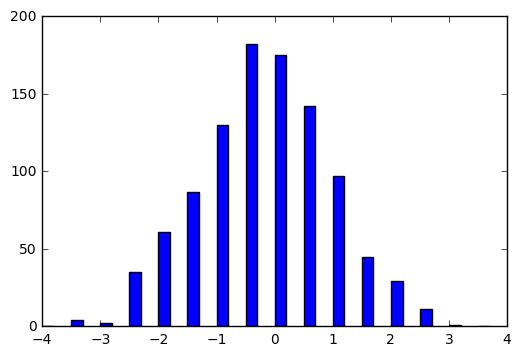

In [92]:
plt.hist(sampler(X_0,N,pi_1) , range = (-4,4), bins = np.linspace(-4,4,17) , width= 0.2 ) ;

/Users/achariberrada/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in double_scalars
/Users/achariberrada/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars
/Users/achariberrada/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars
/Users/achariberrada/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars


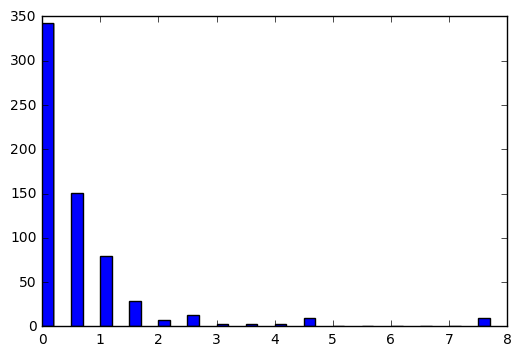

In [91]:
plt.hist(sampler(X_0,N,pi_2) , range = (0,4), bins = np.linspace(0,8,17) , width= 0.2 ) ;